In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,745,745,747,748,750,751,751,752,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,30,35,35,35,36,36,36,43


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 112 entries, Province/State to 5/8/20
dtypes: float64(2), int64(108), object(2)
memory usage: 232.9+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 112 entries, Province/State to 5/8/20
dtypes: float64(2), int64(108), object(2)
memory usage: 232.9+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,766,773,782,789,795,803,820,832,842,850
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,743,745,745,747,748,750,751,751,752,752
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,27,30,35,35,35,36,36,36,43


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


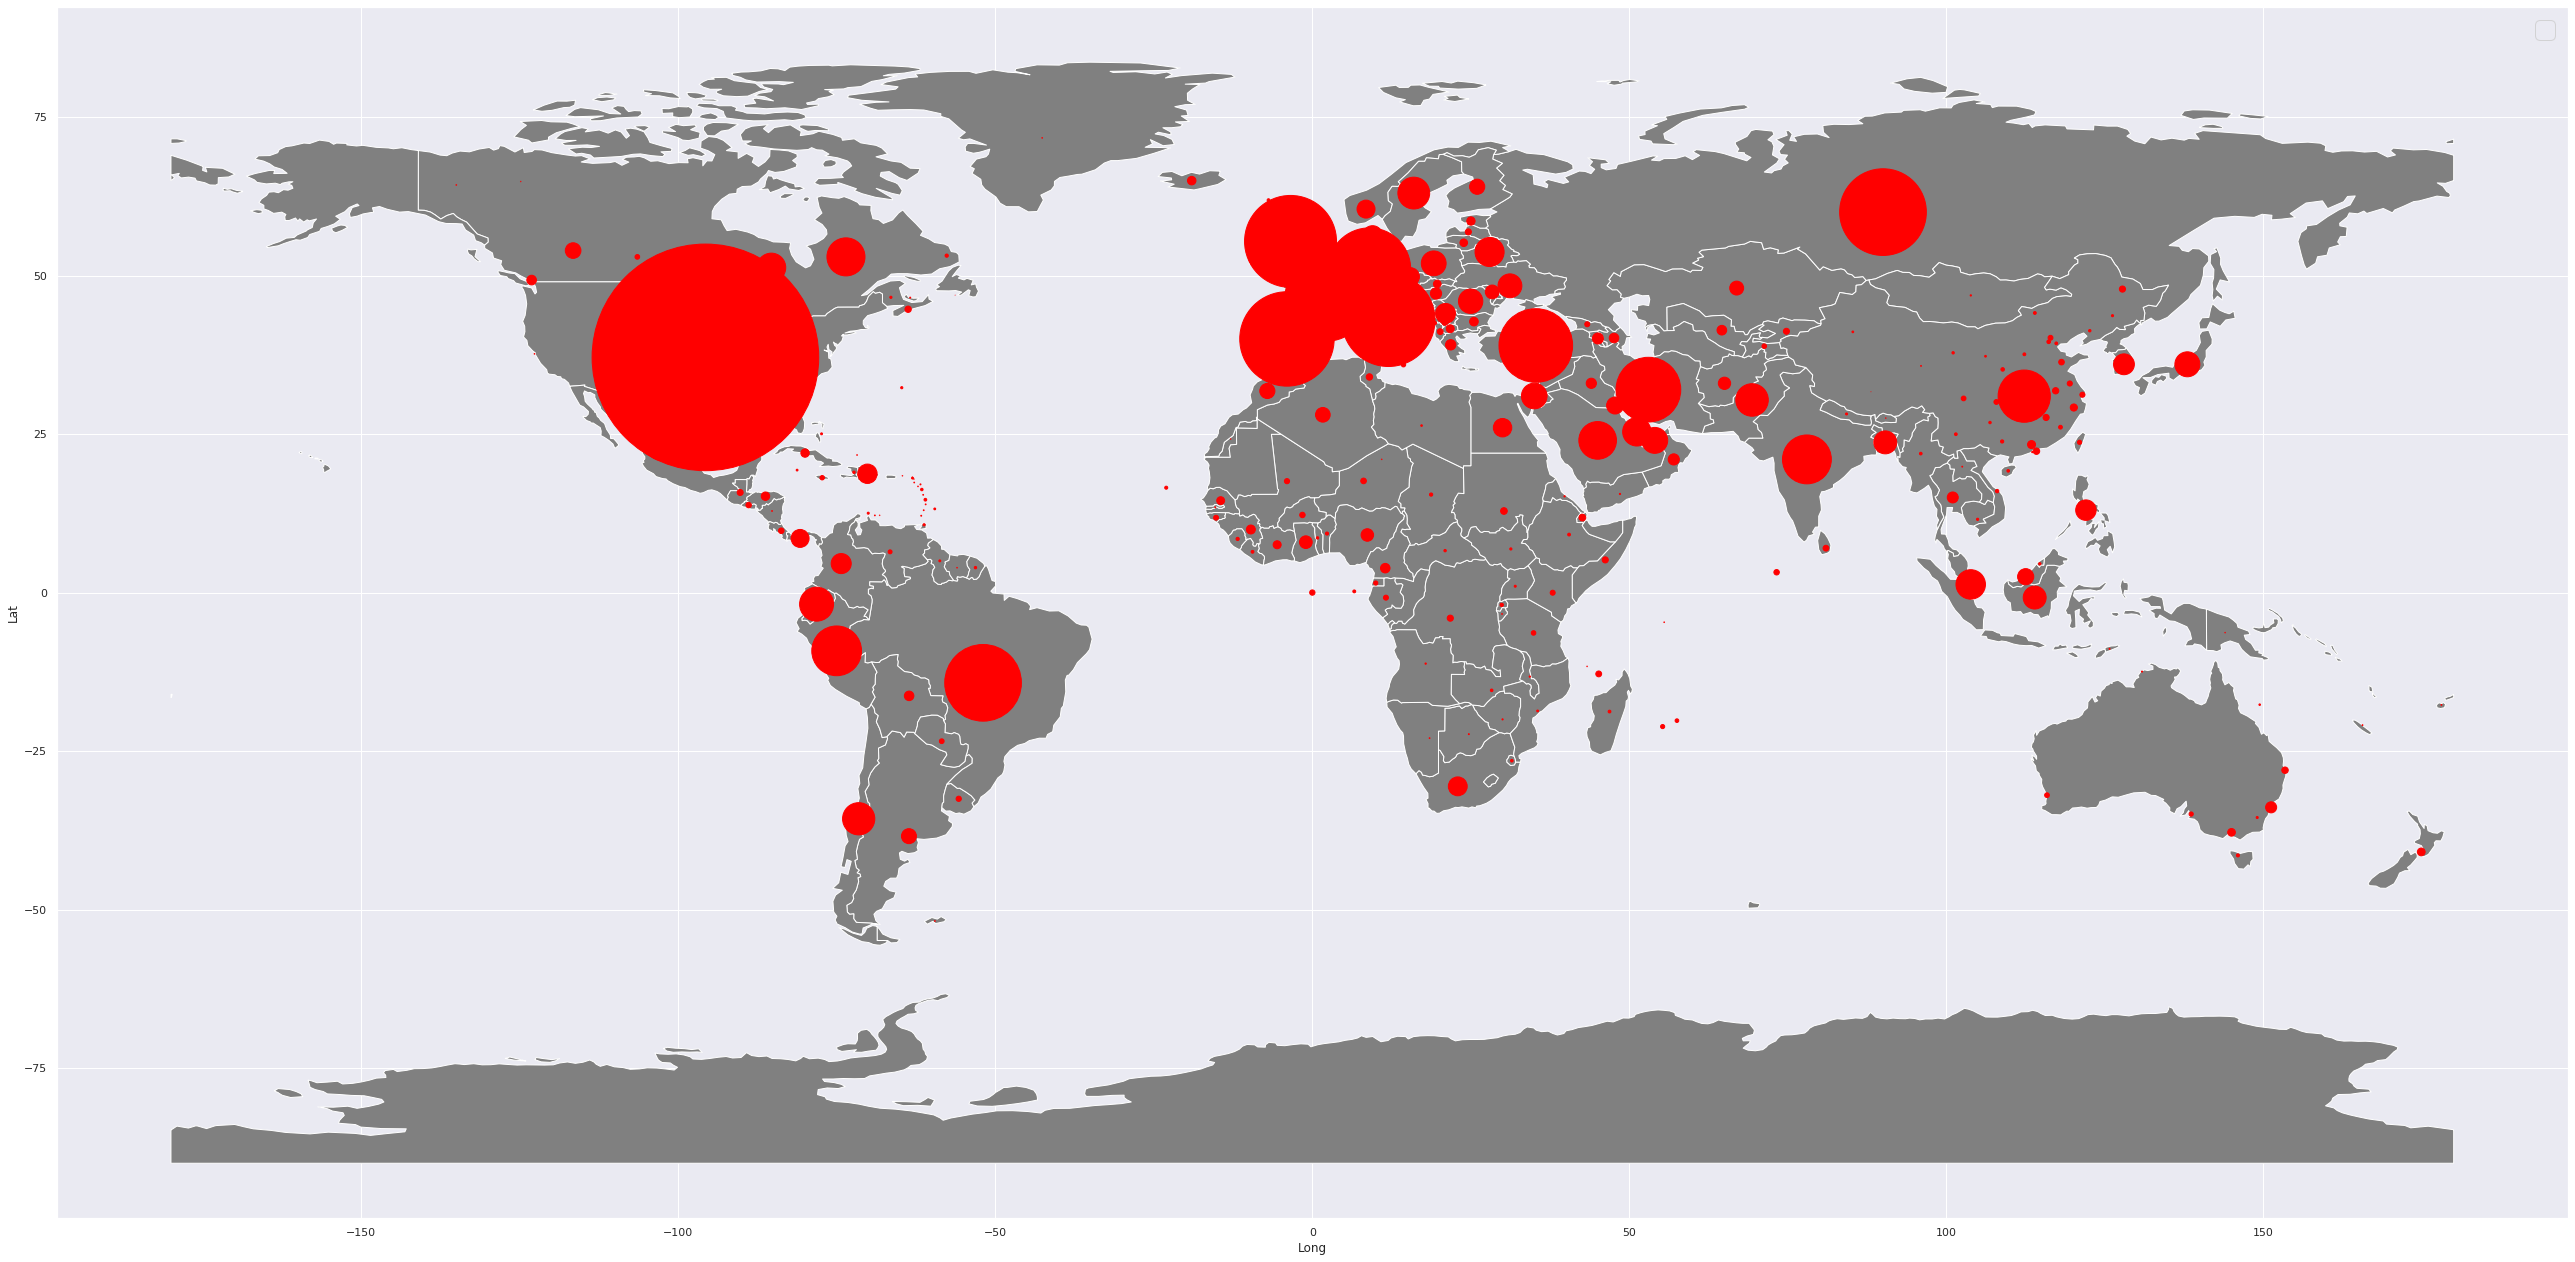

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/25, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/4/20,399,187180,82879,121343,132700,78792,45815,9283,51476,447
5/5/20,413,189791,85231,123486,135100,78870,48221,9333,52842,468
5/6/20,428,189910,93245,126002,139900,78929,51370,9419,54079,486
5/7/20,445,195036,96276,128511,141700,78977,55350,9484,55191,492


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/4/20,742,7197,730,15,555,1178,8235,471,116,1668
5/5/20,755,7523,763,16,587,1270,8480,473,116,1685
5/6/20,761,7731,798,16,633,1461,8807,478,116,1703
5/7/20,765,7868,832,16,695,1685,9095,488,116,1729


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/4/20,6,200,19,5,13,83,346,9,8,69
5/5/20,6,210,19,5,14,93,354,9,8,69
5/6/20,6,218,21,5,15,99,362,9,8,69
5/7/20,6,225,23,5,15,105,373,9,8,73


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/4/20,742,7197,730,15,555,1178,8235,471,116,1668
5/5/20,755,7523,763,16,587,1270,8480,473,116,1685
5/6/20,761,7731,798,16,633,1461,8807,478,116,1703
5/7/20,765,7868,832,16,695,1685,9095,488,116,1729


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/4/20,6,200,19,5,13,83,346,9,8,69
5/5/20,6,210,19,5,14,93,354,9,8,69
5/6/20,6,218,21,5,15,99,362,9,8,69
5/7/20,6,225,23,5,15,105,373,9,8,73


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/4/20,1.004060,1.015092,1.038407,1.000000,1.132653,1.116588,1.035328,1.004264,1.0,1.011522
5/5/20,1.017520,1.045297,1.045205,1.066667,1.057658,1.078098,1.029751,1.004246,1.0,1.010192
5/6/20,1.007947,1.027649,1.045872,1.000000,1.078365,1.150394,1.038561,1.010571,1.0,1.010682
5/7/20,1.005256,1.017721,1.042607,1.000000,1.097946,1.153320,1.032701,1.020921,1.0,1.015267


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,24,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,81,81,83,83,83,89,92,92,92,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,81,81,81,82,82,82,82,82,83,POINT (-59.54320 13.19390)
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,947,959,963,971,985,991,998,1007,1008,POINT (-63.74430 44.68200)
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,6507,7006,7285,7668,7973,8613,8959,9456,10051,POINT (-74.29730 4.57090)
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,719,725,733,739,742,755,761,765,773,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,1501,1537,1611,1649,1668,1685,1703,1729,1741,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,6972,7288,7578,7954,8235,8480,8807,9095,9376,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,395,424,446,490,555,587,633,695,742,POINT (-88.89650 13.79420)
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,126,128,128,128,133,133,138,138,141,POINT (-53.12580 3.93390)


In [36]:
temp.drop([41,82,109,113,115,125, 158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,geometry
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,24,25,25,25,25,25,25,25,25,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,81,81,83,83,83,89,92,92,92,POINT (-77.39630 25.03430)
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,81,81,81,82,82,82,82,82,83,POINT (-59.54320 13.19390)
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,719,725,733,739,742,755,761,765,773,POINT (-83.75340 9.74890)
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,1501,1537,1611,1649,1668,1685,1703,1729,1741,POINT (-80.00000 22.00000)
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,6972,7288,7578,7954,8235,8480,8807,9095,9376,POINT (-70.16270 18.73570)
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,395,424,446,490,555,587,633,695,742,POINT (-88.89650 13.79420)
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,126,128,128,128,133,133,138,138,141,POINT (-53.12580 3.93390)
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,POINT (-63.05010 18.07080)
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,599,644,688,703,730,763,798,832,900,POINT (-90.23080 15.78350)


In [38]:
len(temp)

21

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'5/7/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,5/7/20,5/8/20
0,NaN,Dominican Republic,9095,9376
1,NaN,Panama,7868,8070
2,NaN,Honduras,1685,1771
3,NaN,Cuba,1729,1741
4,NaN,Guatemala,832,900
5,NaN,Costa Rica,765,773
6,NaN,El Salvador,695,742
7,NaN,Jamaica,488,490
8,NaN,Haiti,129,146
9,French Guiana,France,138,141


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
41,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,28,28,29,31,37,38,41,41,44,46
82,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,278,293,314,324,340,358,378,397,407,428
85,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
89,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,58,61,64,66,67,69,69,69,73,74
96,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,293,301,313,326,333,346,354,362,373,380
99,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,9,10,10,11,11,13,14,15,15,16
107,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [49]:
temp_deaths.drop([41,82,109,113,115,125,158,190, 204, 217, 222, 225, 227, 232,233,237, 244, 249,250,251,256], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
85,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
89,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,58,61,64,66,67,69,69,69,73,74
96,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,293,301,313,326,333,346,354,362,373,380
99,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,9,10,10,11,11,13,14,15,15,16
107,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
114,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
123,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,16,16,16,17,17,19,19,21,23,24


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'5/7/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,5/7/20,5/8/20
0,NaN,Dominican Republic,373,380
1,NaN,Panama,225,231
2,NaN,Honduras,105,107
3,NaN,Cuba,73,74
4,NaN,Guatemala,23,24
5,NaN,El Salvador,15,16
6,Sint Maarten,Netherlands,14,14
7,NaN,Haiti,12,12
8,NaN,Bahamas,11,11
9,NaN,Jamaica,9,9


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,11,11,15,15,15,15,16,16,16,16
18,NaN,Bahamas,25.034300,-77.396300,0,0,0,0,0,0,...,23,25,24,24,24,25,26,26,26,31
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,39,39,39,44,44,46,47,47,53,53
24,NaN,Belize,13.193900,-59.543200,0,0,0,0,0,0,...,9,9,13,13,13,14,16,16,16,16
73,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,1411,1439,1551,1666,1722,1807,2013,2148,2300,2424
76,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,323,338,355,372,386,399,413,428,445,461
80,NaN,Cuba,22.000000,-80.000000,0,0,0,0,0,0,...,617,681,714,765,827,876,954,1001,1031,1078
87,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,13,13,13,13,13,13,14,14,14,14
88,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1228,1301,1387,1481,1606,1771,1905,1960,2064,2286
91,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,106,119,124,141,154,180,205,219,252,257


In [59]:
temp_recovered.drop([24,73,87,101,102,106,114,119,154,186,188,202,217, 222, 225, 227,235,236,237, 242], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
5,NaN,Antigua and Barbuda,17.0608,-61.7964,0,0,0,0,0,0,...,11,11,15,15,15,15,16,16,16,16
18,NaN,Bahamas,25.0343,-77.3963,0,0,0,0,0,0,...,23,25,24,24,24,25,26,26,26,31
21,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,39,39,39,44,44,46,47,47,53,53
76,NaN,Costa Rica,9.7489,-83.7534,0,0,0,0,0,0,...,323,338,355,372,386,399,413,428,445,461
80,NaN,Cuba,22.0000,-80.0000,0,0,0,0,0,0,...,617,681,714,765,827,876,954,1001,1031,1078
88,NaN,Dominican Republic,18.7357,-70.1627,0,0,0,0,0,0,...,1228,1301,1387,1481,1606,1771,1905,1960,2064,2286
91,NaN,El Salvador,13.7942,-88.8965,0,0,0,0,0,0,...,106,119,124,141,154,180,205,219,252,257
99,French Guiana,France,3.9339,-53.1258,0,0,0,0,0,0,...,93,94,98,98,98,100,100,111,112,119
107,St Martin,France,18.0708,-63.0501,0,0,0,0,0,0,...,24,24,27,27,27,29,29,29,30,30
116,NaN,Guatemala,15.7835,-90.2308,0,0,0,0,0,0,...,62,66,72,72,72,79,79,86,90,101


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'5/7/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,5/7/20,5/8/20
0,NaN,Dominican Republic,2064,2286
1,NaN,Cuba,1031,1078
2,NaN,Panama,886,886
3,NaN,Costa Rica,445,461
4,NaN,El Salvador,252,257
5,NaN,Honduras,154,192
6,French Guiana,France,112,119
7,NaN,Trinidad and Tobago,103,103
8,NaN,Guatemala,90,101
9,Aruba,Netherlands,89,89


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,24,24,25,25,25,25,25,25,25,25
1,Bahamas,0,0,0,0,0,0,0,0,0,...,80,81,81,83,83,83,89,92,92,92
2,Barbados,0,0,0,0,0,0,0,0,0,...,80,81,81,81,82,82,82,82,82,83
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,713,719,725,733,739,742,755,761,765,773
4,Cuba,0,0,0,0,0,0,0,0,0,...,1467,1501,1537,1611,1649,1668,1685,1703,1729,1741
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,6652,6972,7288,7578,7954,8235,8480,8807,9095,9376
6,El Salvador,0,0,0,0,0,0,0,0,0,...,377,395,424,446,490,555,587,633,695,742
7,French Guiana,0,0,0,0,0,0,0,0,0,...,125,126,128,128,128,133,133,138,138,141
8,St Martin,0,0,0,0,0,0,0,0,0,...,38,38,38,38,38,38,38,38,38,38
9,Guatemala,0,0,0,0,0,0,0,0,0,...,557,599,644,688,703,730,763,798,832,900


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
4,Cuba,0,0,0,0,0,0,0,0,0,...,58,61,64,66,67,69,69,69,73,74
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,293,301,313,326,333,346,354,362,373,380
6,El Salvador,0,0,0,0,0,0,0,0,0,...,9,10,10,11,11,13,14,15,15,16
7,French Guiana,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
9,Guatemala,0,0,0,0,0,0,0,0,0,...,16,16,16,17,17,19,19,21,23,24


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,11,11,15,15,15,15,16,16,16,16
1,Bahamas,0,0,0,0,0,0,0,0,0,...,23,25,24,24,24,25,26,26,26,31
2,Barbados,0,0,0,0,0,0,0,0,0,...,39,39,39,44,44,46,47,47,53,53
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,323,338,355,372,386,399,413,428,445,461
4,Cuba,0,0,0,0,0,0,0,0,0,...,617,681,714,765,827,876,954,1001,1031,1078
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,1228,1301,1387,1481,1606,1771,1905,1960,2064,2286
6,El Salvador,0,0,0,0,0,0,0,0,0,...,106,119,124,141,154,180,205,219,252,257
7,French Guiana,0,0,0,0,0,0,0,0,0,...,93,94,98,98,98,100,100,111,112,119
8,St Martin,0,0,0,0,0,0,0,0,0,...,24,24,27,27,27,29,29,29,30,30
9,Guatemala,0,0,0,0,0,0,0,0,0,...,62,66,72,72,72,79,79,86,90,101


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(70, 21)

In [75]:
recovered_camcar_all.shape

(70, 21)

In [76]:
deaths_camcar_all.shape

(70, 21)

In [77]:
active_camcar_all.shape

(70, 21)